GIẢNG VIÊN: ThS. Nguyễn Thị Anh Thư

LỚP: CS313.N21

NHÓM 4:

Nguyễn Duy Đạt - 20520435

Nguyễn Quốc Huy Hoàng - 20520051

Lê Đoàn Phúc Minh - 20520243

Huỳnh Hoàng Vũ - 20520864

Bài tập : 4.1 demo

In [1]:
from sklearn import datasets

In [2]:
# load the MNIST digits dataset
mnist = datasets.load_digits()

In [3]:
from sklearn.model_selection import train_test_split
import numpy as np
# Training and testing split,
# 75% for training and 25% for testing
(trainData, testData, trainLabels, testLabels) = train_test_split(np.array(mnist.data), mnist.target, test_size=0.25, random_state=42)

# take 10% of the training data and use that for validation
(trainData, valData, trainLabels, valLabels) = train_test_split(trainData, trainLabels, test_size=0.1, random_state=84)

In [4]:
# Checking sizes of each data split
print("training data points: {}".format(len(trainLabels)))
print("validation data points: {}".format(len(valLabels)))
print("testing data points: {}".format(len(testLabels)))

training data points: 1212
validation data points: 135
testing data points: 450


# KNN

In [5]:
from sklearn.neighbors import KNeighborsClassifier
kVals = range(1, 30, 2)
accuracies = []

# loop over kVals
for k in kVals:
    # train the classifier with the current value of `k`
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(trainData, trainLabels)

    # evaluate the model and print the accuracies list
    score = model.score(valData, valLabels)
    print("k=%d, accuracy=%.2f%%" % (k, score * 100))
    accuracies.append(score)

k=1, accuracy=99.26%
k=3, accuracy=99.26%
k=5, accuracy=99.26%
k=7, accuracy=99.26%
k=9, accuracy=99.26%
k=11, accuracy=99.26%
k=13, accuracy=99.26%
k=15, accuracy=99.26%
k=17, accuracy=98.52%
k=19, accuracy=98.52%
k=21, accuracy=97.78%
k=23, accuracy=97.04%
k=25, accuracy=97.78%
k=27, accuracy=97.04%
k=29, accuracy=97.04%


In [6]:
from sklearn.metrics import classification_report
# largest accuracy
# np.argmax returns the indices of the maximum values along an axis
i = np.argmax(accuracies)
print("k=%d achieved highest accuracy of %.2f%% on validation data" % (kVals[i],
    accuracies[i] * 100))


# Now that I know the best value of k, re-train the classifier
model = KNeighborsClassifier(n_neighbors=kVals[i])
model.fit(trainData, trainLabels)

# Predict labels for the test set
predictions = model.predict(testData)

# Evaluate performance of model for each of the digits
print("EVALUATION ON TESTING DATA")
print(classification_report(testLabels, predictions))

k=1 achieved highest accuracy of 99.26% on validation data
EVALUATION ON TESTING DATA
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.95      1.00      0.97        37
           2       1.00      1.00      1.00        38
           3       0.98      0.98      0.98        46
           4       0.98      0.98      0.98        55
           5       0.98      1.00      0.99        59
           6       1.00      1.00      1.00        45
           7       1.00      0.98      0.99        41
           8       0.97      0.95      0.96        38
           9       0.96      0.94      0.95        48

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



In [7]:
from yellowbrick.classifier import ClassificationReport

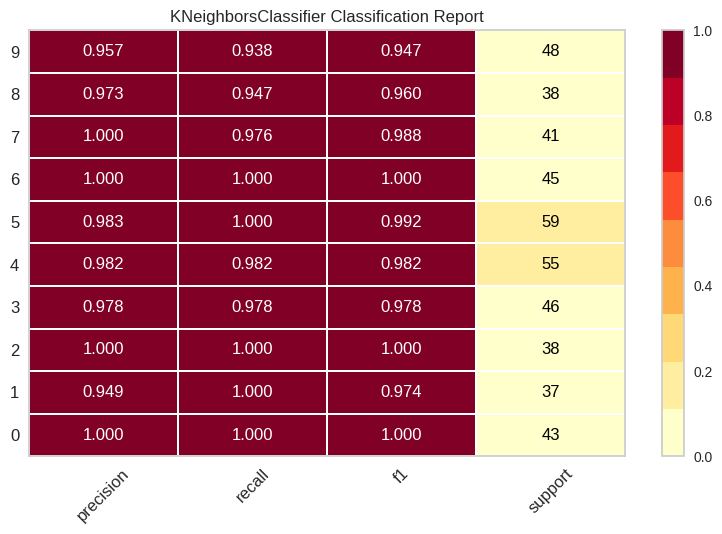

In [8]:
model = KNeighborsClassifier(n_neighbors=kVals[i])
model.fit(trainData, trainLabels)
classes = range(10)
visualizer = ClassificationReport(model, classes=classes, support=True)

visualizer.fit(trainData, trainLabels)  # Fit the visualizer and the model
visualizer.score(testData, testLabels)  # Evaluate the model on the test data

g = visualizer.poof()             # Draw/show/poof the data

# Logistic Regression

In [9]:
from sklearn.linear_model import LogisticRegression

In [10]:
clf = LogisticRegression()
clf.fit(trainData, trainLabels)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [11]:
from sklearn.metrics import accuracy_score
y_val_pred = clf.predict(valData)
y_test_pred = clf.predict(testData)

print("Accuracy on validation: ", accuracy_score(valLabels, y_val_pred))

Accuracy on validation:  0.9703703703703703


In [12]:
print(classification_report(testLabels, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.92      0.95      0.93        37
           2       0.92      0.95      0.94        38
           3       0.98      0.96      0.97        46
           4       1.00      0.96      0.98        55
           5       0.93      0.97      0.95        59
           6       0.96      0.98      0.97        45
           7       1.00      0.98      0.99        41
           8       0.92      0.95      0.94        38
           9       1.00      0.96      0.98        48

    accuracy                           0.96       450
   macro avg       0.96      0.96      0.96       450
weighted avg       0.97      0.96      0.96       450



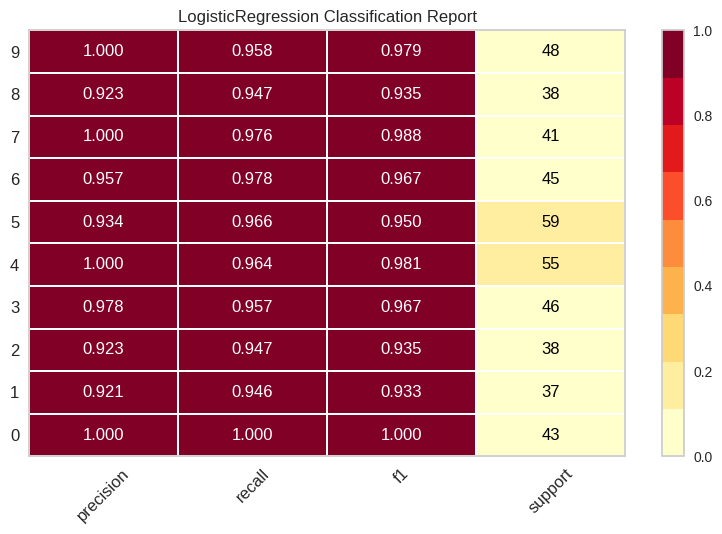

In [13]:
classes = range(10)
visualizer = ClassificationReport(clf, classes=classes, support=True)

visualizer.fit(trainData, trainLabels)  # Fit the visualizer and the model
visualizer.score(testData, testLabels)  # Evaluate the model on the test data

g = visualizer.poof()             # Draw/show/poof the data

# Decision Tree

In [14]:
from sklearn.tree import DecisionTreeClassifier

In [15]:
clf_dt = DecisionTreeClassifier()
clf_dt.fit(trainData, trainLabels)

DecisionTreeClassifier()

In [17]:
y_val_pred = clf_dt.predict(valData)
y_test_pred = clf_dt.predict(testData)

print("Accuracy on validation: ", accuracy_score(valLabels, y_val_pred))

Accuracy on validation:  0.8592592592592593


In [18]:
print(classification_report(testLabels, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.88      0.94        43
           1       0.82      0.86      0.84        37
           2       0.79      0.79      0.79        38
           3       0.95      0.87      0.91        46
           4       0.78      0.84      0.81        55
           5       0.93      0.86      0.89        59
           6       0.93      0.96      0.95        45
           7       0.88      0.88      0.88        41
           8       0.74      0.89      0.81        38
           9       0.85      0.81      0.83        48

    accuracy                           0.86       450
   macro avg       0.87      0.86      0.86       450
weighted avg       0.87      0.86      0.87       450



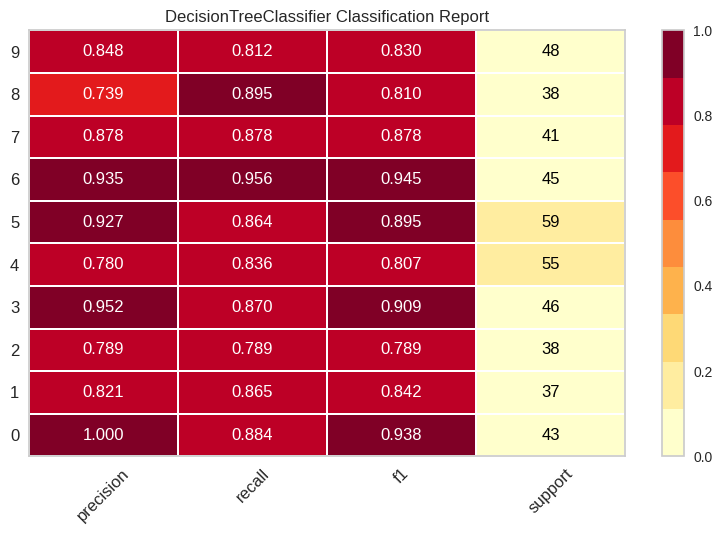

In [19]:
classes = range(10)
visualizer = ClassificationReport(clf_dt, classes=classes, support=True)

visualizer.fit(trainData, trainLabels)  # Fit the visualizer and the model
visualizer.score(testData, testLabels)  # Evaluate the model on the test data

g = visualizer.poof()             # Draw/show/poof the data

# Naive Bayes

In [21]:
from sklearn.naive_bayes import GaussianNB

In [22]:
clf_nb = GaussianNB()
clf_nb.fit(trainData, trainLabels)

GaussianNB()

In [23]:
y_val_pred = clf_nb.predict(valData)
y_test_pred = clf_nb.predict(testData)

print("Accuracy on validation: ", accuracy_score(valLabels, y_val_pred))

Accuracy on validation:  0.8518518518518519


In [24]:
print(classification_report(testLabels, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.88      0.81      0.85        37
           2       0.89      0.63      0.74        38
           3       0.97      0.83      0.89        46
           4       1.00      0.82      0.90        55
           5       0.90      0.93      0.92        59
           6       0.88      0.98      0.93        45
           7       0.70      0.98      0.82        41
           8       0.61      0.92      0.74        38
           9       0.90      0.73      0.80        48

    accuracy                           0.86       450
   macro avg       0.87      0.86      0.86       450
weighted avg       0.88      0.86      0.86       450



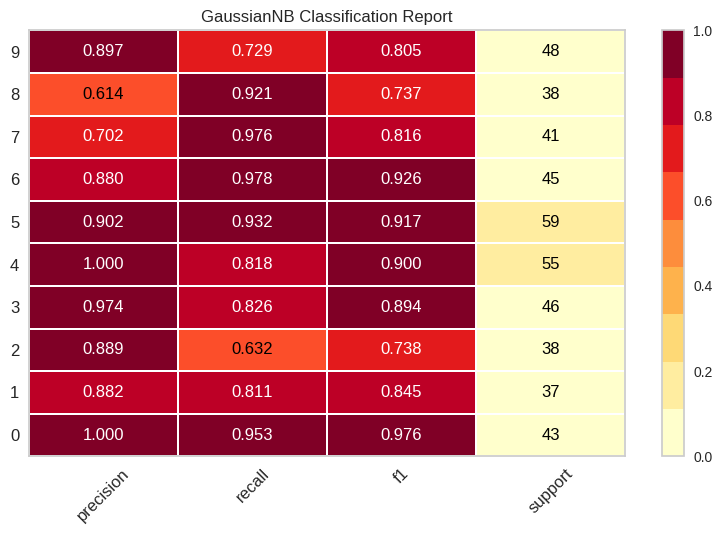

In [25]:
classes = range(10)
visualizer = ClassificationReport(clf_nb, classes=classes, support=True)

visualizer.fit(trainData, trainLabels)  # Fit the visualizer and the model
visualizer.score(testData, testLabels)  # Evaluate the model on the test data

g = visualizer.poof()             # Draw/show/poof the data

# GridSearch

-GridSearch with LogisticRegression

In [31]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [27]:
param_grid = {
    'penalty' : ['l1', 'l2', 'elasticnet'],
    'C': (1, 5, 1),
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'sag']
}

In [28]:
grid_search = GridSearchCV(clf, param_grid, cv=5)

In [32]:
grid_search.fit(trainData, trainLabels)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': (1, 5, 1), 'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg', 'sag']})

In [33]:
# Print the best parameters and score
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
print("Test set score: {:.2f}".format(grid_search.score(testData, testLabels)))

Best parameters: {'C': 1, 'penalty': 'l2', 'solver': 'sag'}
Best cross-validation score: 0.96
Test set score: 0.97


# Balance data


## Use RandomOverSampling

In [37]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from collections import Counter

print('The number of original labels: ')
print(sorted(Counter(mnist.target).items()))

X, y = np.array(mnist.data), mnist.target

ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, y)

print('The number of resampled labels: ')
print(sorted(Counter(y_resampled).items()))

The number of original labels: 
[(0, 178), (1, 182), (2, 177), (3, 183), (4, 181), (5, 182), (6, 181), (7, 179), (8, 174), (9, 180)]
The number of resampled labels: 
[(0, 183), (1, 183), (2, 183), (3, 183), (4, 183), (5, 183), (6, 183), (7, 183), (8, 183), (9, 183)]


## Use SMOTE

In [38]:
print('The number of original labels: ')
print(sorted(Counter(mnist.target).items()))

X, y = np.array(mnist.data), mnist.target

X_resampled, y_resampled = SMOTE().fit_resample(X, y)

print('The number of resampled labels: ')
print(sorted(Counter(y_resampled).items()))

The number of original labels: 
[(0, 178), (1, 182), (2, 177), (3, 183), (4, 181), (5, 182), (6, 181), (7, 179), (8, 174), (9, 180)]
The number of resampled labels: 
[(0, 183), (1, 183), (2, 183), (3, 183), (4, 183), (5, 183), (6, 183), (7, 183), (8, 183), (9, 183)]
